<a href="https://colab.research.google.com/github/Julianh1206/Random-Forest-Model/blob/main/RF_Simposio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Random Forest
Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir, basándose en mediciones diagnósticas, si un paciente tiene diabetes.

In [1]:
# cargue de librerias para avisos
import warnings # para evitar warnings
warnings.filterwarnings('ignore')

# cargue de librerias madres
import pandas as pd # para manejo de datos
import numpy as np # para operaciones numéricas
import matplotlib.pyplot as plt # para gráficos
import seaborn as sns # para gráficos estadísticos

# cargue de librerias para modelos
import statsmodels.api as sm # para regresión logística
from sklearn.model_selection import train_test_split, GridSearchCV # para dividir el dataset en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler, OneHotEncoder # para estandarizar y codificar las variables
from sklearn.compose import ColumnTransformer # para aplicar el preprocesamiento a todas las variables
from sklearn.ensemble import RandomForestClassifier # para el modelo de Random Forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # para evaluar el modelo
from sklearn.pipeline import Pipeline # para crear un pipeline de preprocesamiento y el modelo

# cargue de librerias de muestreo
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# formato de decimal
pd.options.display.float_format = "{:.2f}".format

## 1. Análisis Exploratorio de Datos (AED)
### 2.1 Preparación de datos:

In [2]:
# Lectura de base de datos:
datos = pd.read_csv('/content/diabetes_prediction_dataset.csv')
datos.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [3]:
# tamaño de la base de datos
datos.shape

(100000, 9)

In [4]:
## identificando datos duplicados:
datos_duplicados = datos[datos.duplicated()]
datos_duplicados.shape

(3854, 9)

In [5]:
## eliminando esos datos duplicados:
datos = datos.drop_duplicates()
datos.shape

(96146, 9)

In [6]:
## recorramos el número de variables y la cantidad de valores que hay en cada una de ellas
for col in datos.columns:
  valores_distintos = len(datos[col].unique())
  print(f"La variable {col} tiene {valores_distintos} valores distintos")

La variable gender tiene 3 valores distintos
La variable age tiene 102 valores distintos
La variable hypertension tiene 2 valores distintos
La variable heart_disease tiene 2 valores distintos
La variable smoking_history tiene 6 valores distintos
La variable bmi tiene 4247 valores distintos
La variable HbA1c_level tiene 18 valores distintos
La variable blood_glucose_level tiene 18 valores distintos
La variable diabetes tiene 2 valores distintos


In [7]:
# revisando valores nulos:
datos.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
# identifiquemos cuál es otro valor de genero diferente a male y female, qué porcentaje representa?
datos['gender'].value_counts()
# representando un (18/96146)*100 = 0.018% del total de los datos

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [9]:
# eliminar de la variable genero el valor de "Otro" e identifiquemos cuánto representa:
datos = datos[datos['gender'] != 'Other']

In [10]:
# resumen:
datos.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


### 2.2 Análisis univariado

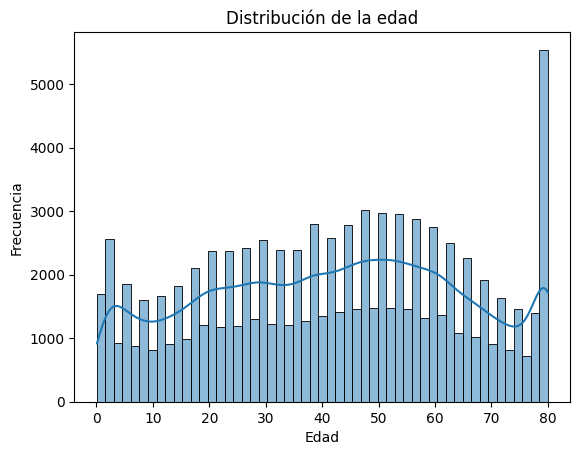

In [11]:
# histograma para la edad:
sns.histplot(datos['age'], kde=True)
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

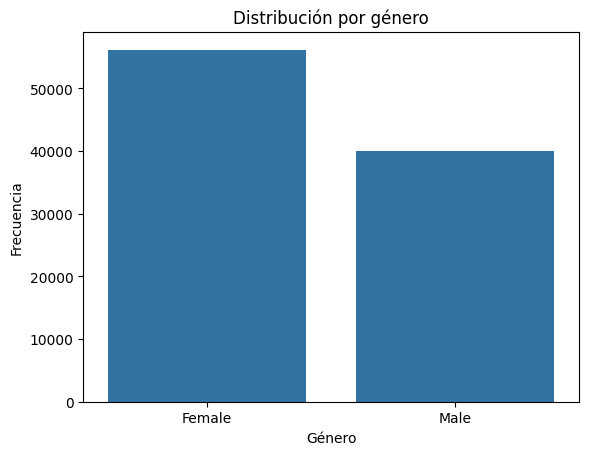

In [ ]:
# barplot por género:
sns.countplot(x='gender', data=datos)
plt.title('Distribución por género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

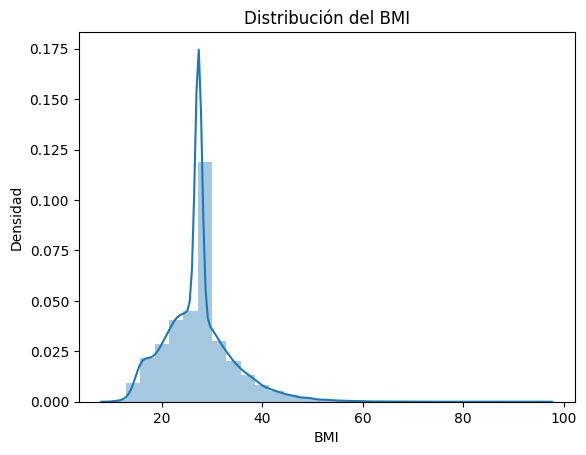

In [ ]:
# gráfico de distribución por BMI
sns.distplot(datos['bmi'], bins=30)
plt.title('Distribución del BMI')
plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.show()

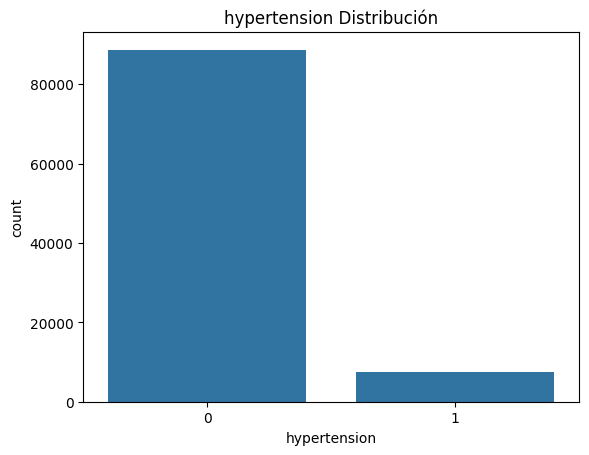

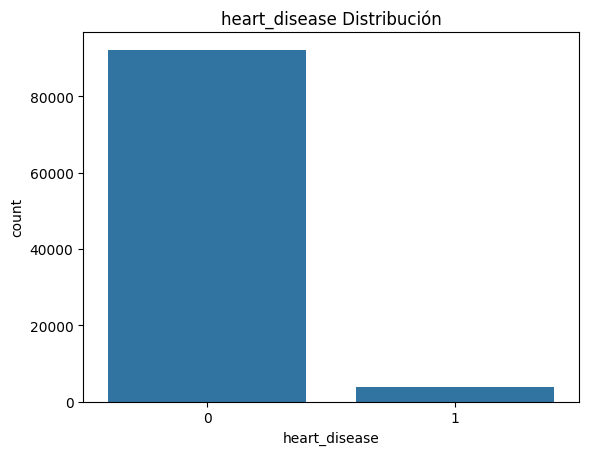

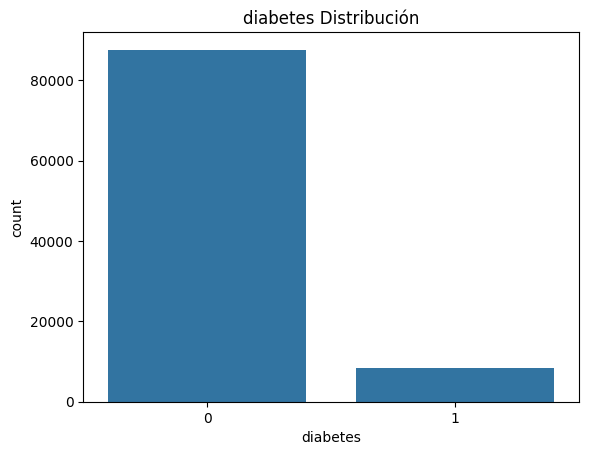

In [ ]:
# gráficas para variables binarias:
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=datos)
    plt.title(f'{col} Distribución')
    plt.show()

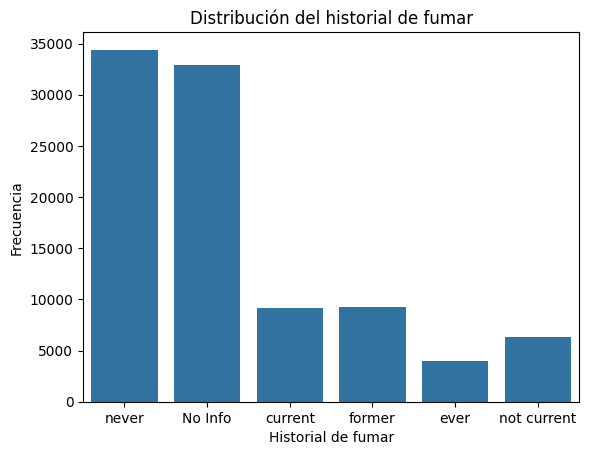

In [ ]:
# Gráfico para el historial de fumar:
sns.countplot(x='smoking_history', data=datos)
plt.title('Distribución del historial de fumar')
plt.xlabel('Historial de fumar')
plt.ylabel('Frecuencia')
plt.show()

### 2.3 Análisis Bivariado:


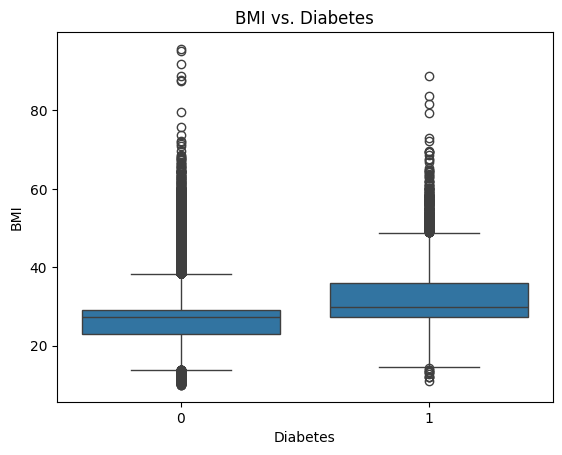

In [ ]:
# BMI vs. Clasificación de diabetes
sns.boxplot(x='diabetes', y='bmi', data=datos)
plt.title('BMI vs. Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()

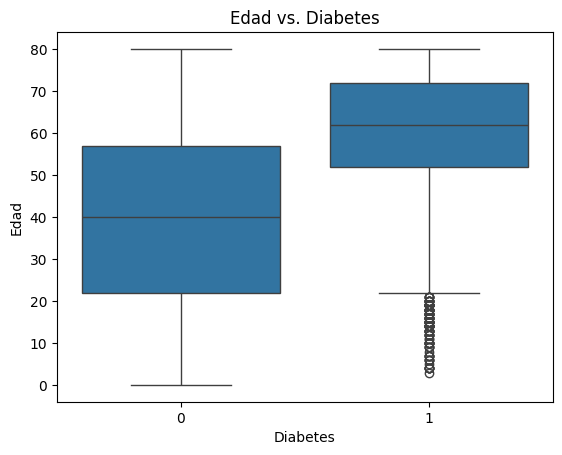

In [ ]:
# Edad vs. Clasificación de diabetes
sns.boxplot(x='diabetes', y='age', data=datos)
plt.title('Edad vs. Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Edad')
plt.show()

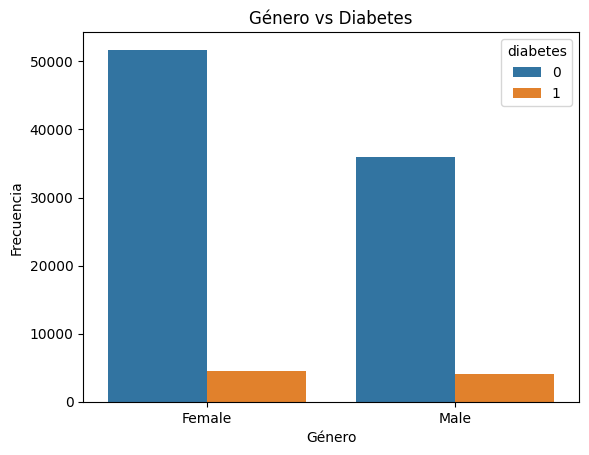

In [ ]:
# Género vs. Clasificación de diabetes
sns.countplot(x='gender', hue='diabetes', data=datos)
plt.title('Género vs Diabetes')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

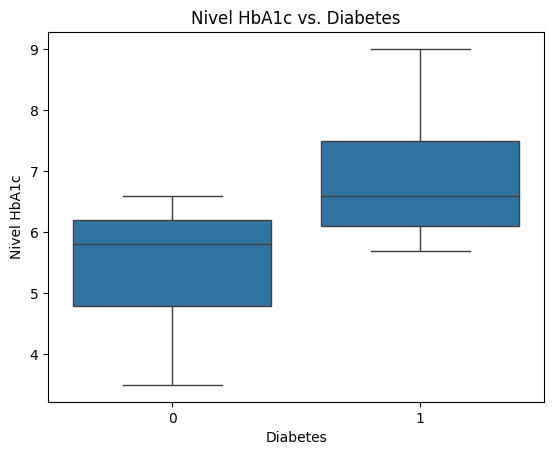

In [ ]:
# Nivel HbA1c vs. Clasificación de diabetes
sns.boxplot(x='diabetes', y='HbA1c_level', data=datos)
plt.title('Nivel HbA1c vs. Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Nivel HbA1c')
plt.show()

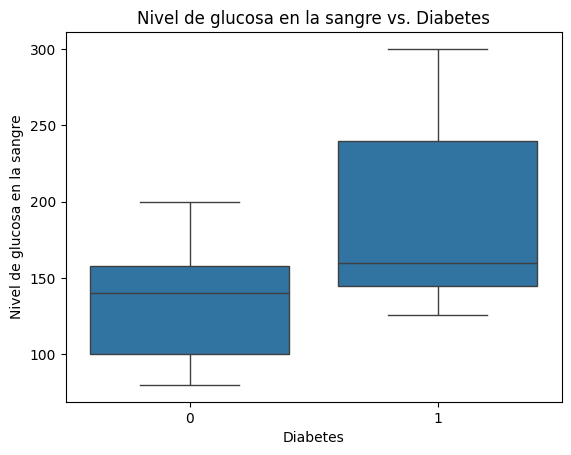

In [ ]:
# Nivel de glucosa en la sangre vs. Clasificación de diabetes
sns.boxplot(x='diabetes', y='blood_glucose_level', data=datos)
plt.title('Nivel de glucosa en la sangre vs. Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Nivel de glucosa en la sangre')
plt.show()

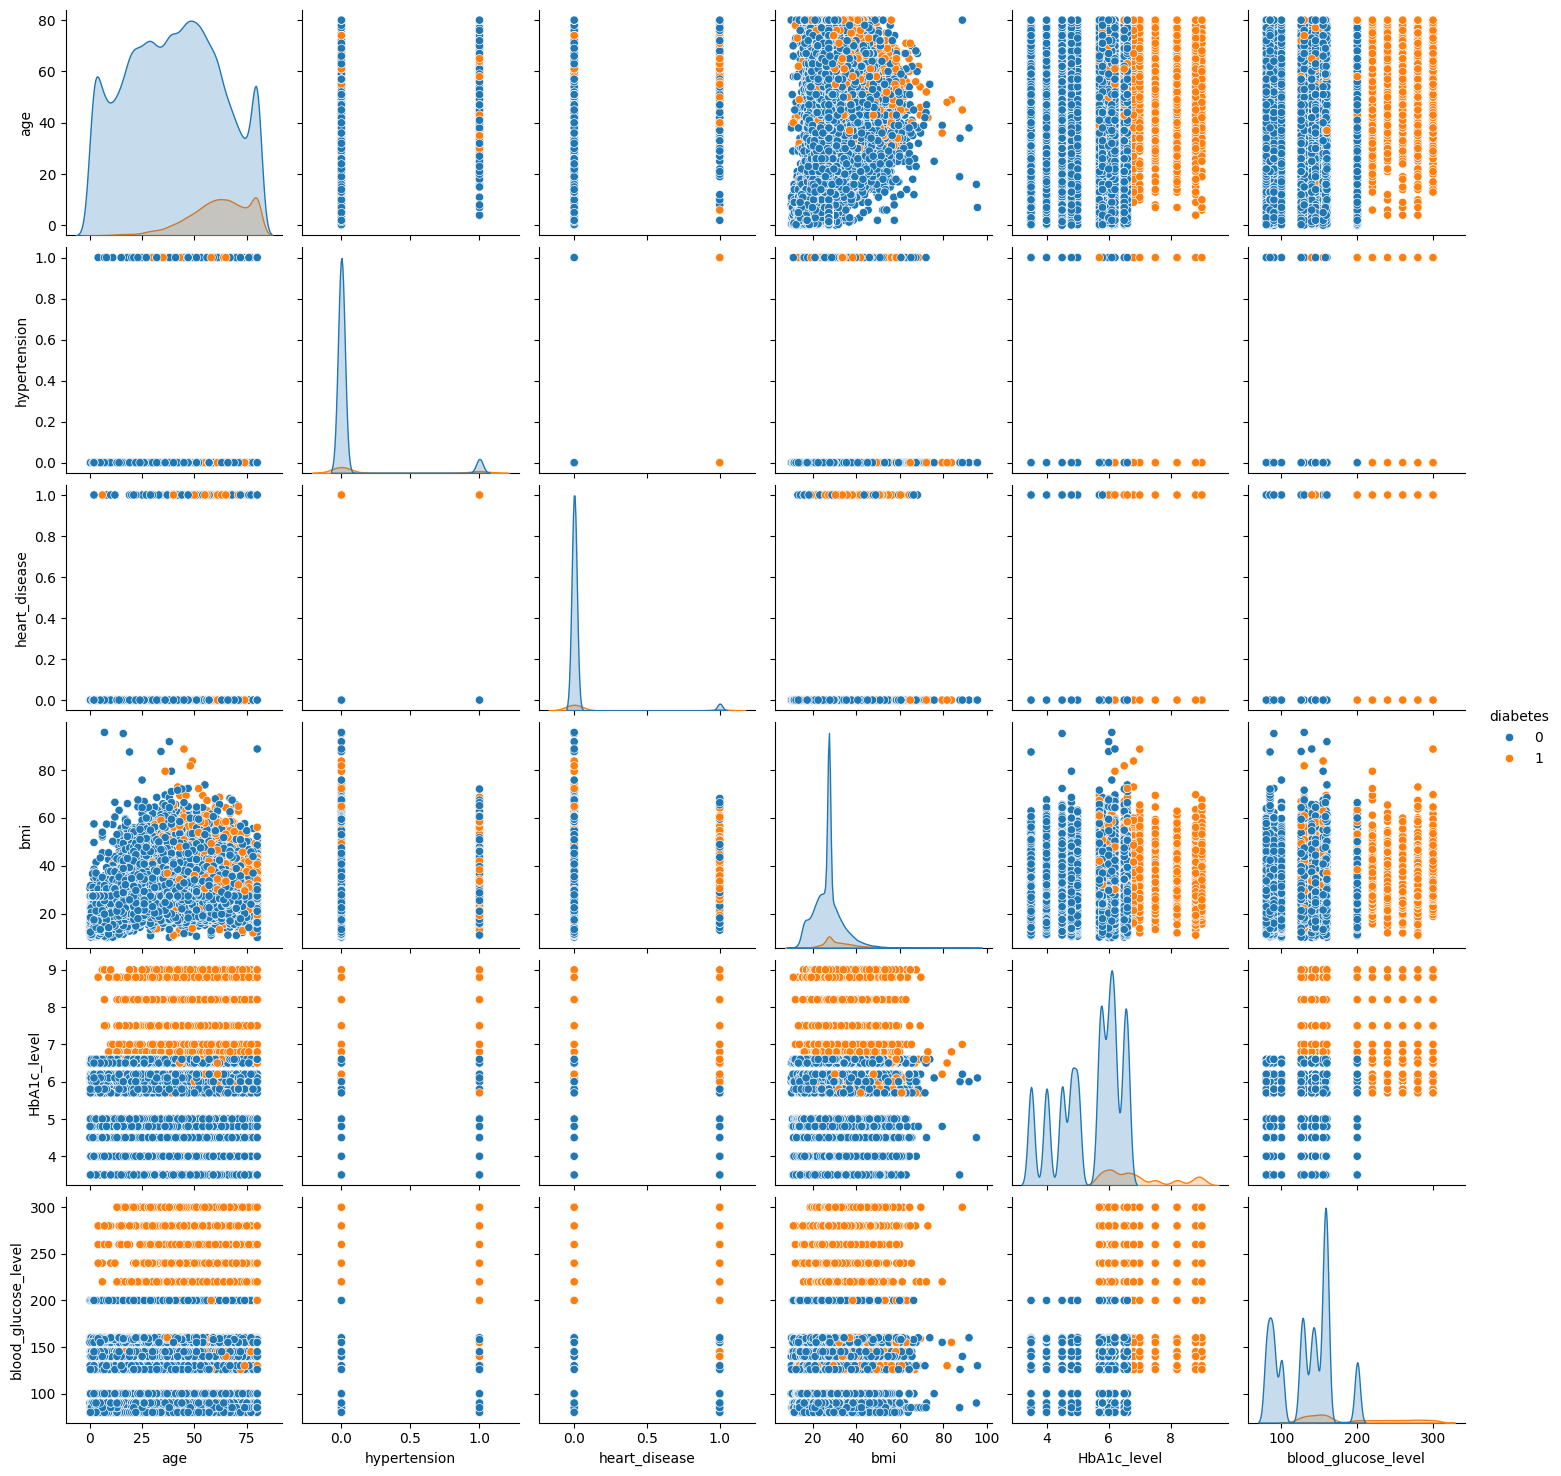

In [ ]:
# Pair plot para las variables numéricas:
sns.pairplot(datos, hue='diabetes')
plt.show()

### 2.4 Análisis Multivariado

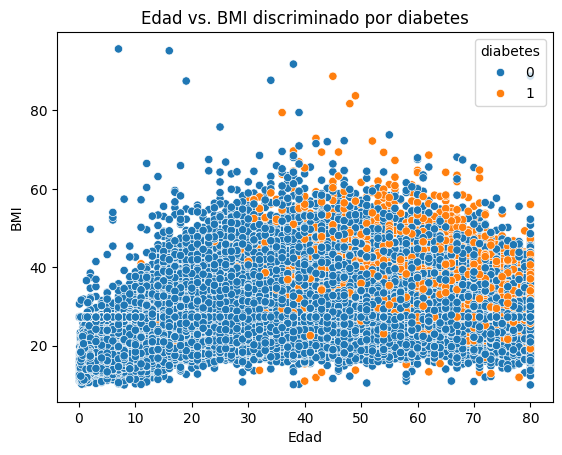

In [ ]:
# Edad vs. BMI discriminado por la clasificación de diabetes:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=datos)
plt.title('Edad vs. BMI discriminado por diabetes')
plt.xlabel('Edad')
plt.ylabel('BMI')
plt.show()

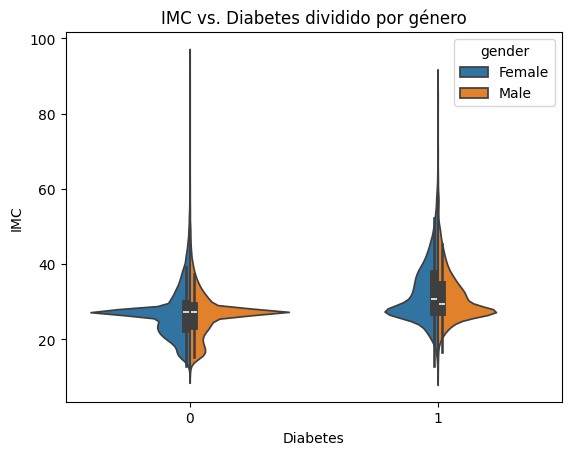

In [ ]:
# Gráfico de violín del IMC frente a la clasificación de la diabetes dividido por género
sns.violinplot(x='diabetes', y='bmi', hue='gender', split = True , data=datos)
plt.title('IMC vs. Diabetes dividido por género')
plt.xlabel('Diabetes')
plt.ylabel('IMC')
plt.show()

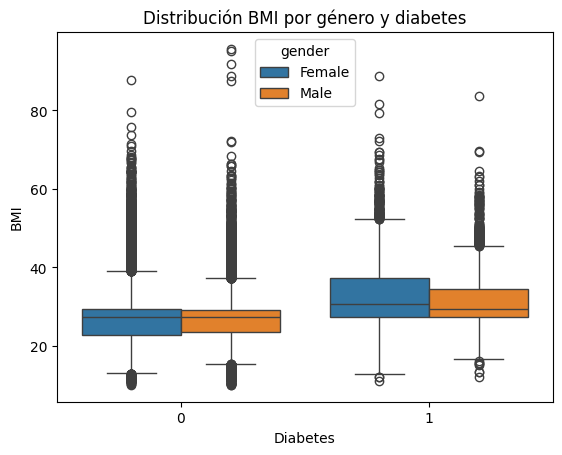

In [ ]:
# Interacción entre género, IMC y diabetes:
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=datos)
plt.title('Distribución BMI por género y diabetes')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()

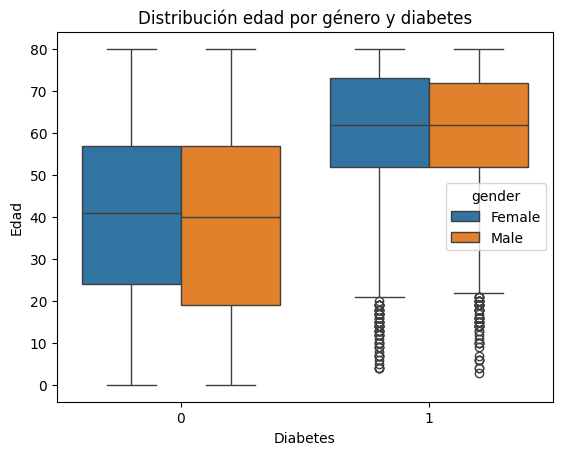

In [ ]:
# Interacción entre género, edad y diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=datos)
plt.title('Distribución edad por género y diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Edad')
plt.show()

## 2. Correlación:

In [12]:
# Preparación de datos:
# Definir una función que mapea los estados
def reca_fumador(estado_fum):
    if estado_fum in ['never', 'No Info']:
        return 'non-smoker'
    elif estado_fum == 'current':
        return 'current'
    elif estado_fum in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Aplicar la función a la variable'smoking_history'
datos['smoking_history'] = datos['smoking_history'].apply(reca_fumador)

# Revisar el nuevo conteo
print(datos['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [13]:
dataset = datos.copy()

In [14]:
# Organizar la base de datos con respecto a las variables dummy:
def codificacion(datos, column_name):
    dummies = pd.get_dummies(datos[column_name], prefix=column_name)
    datos = pd.concat([datos.drop(column_name, axis=1), dummies], axis=1)
    return datos

# codificación para la varibale género:
datos = codificacion(datos, 'gender')

# codificació para el historial de fumador:
datos = codificacion(datos, 'smoking_history')


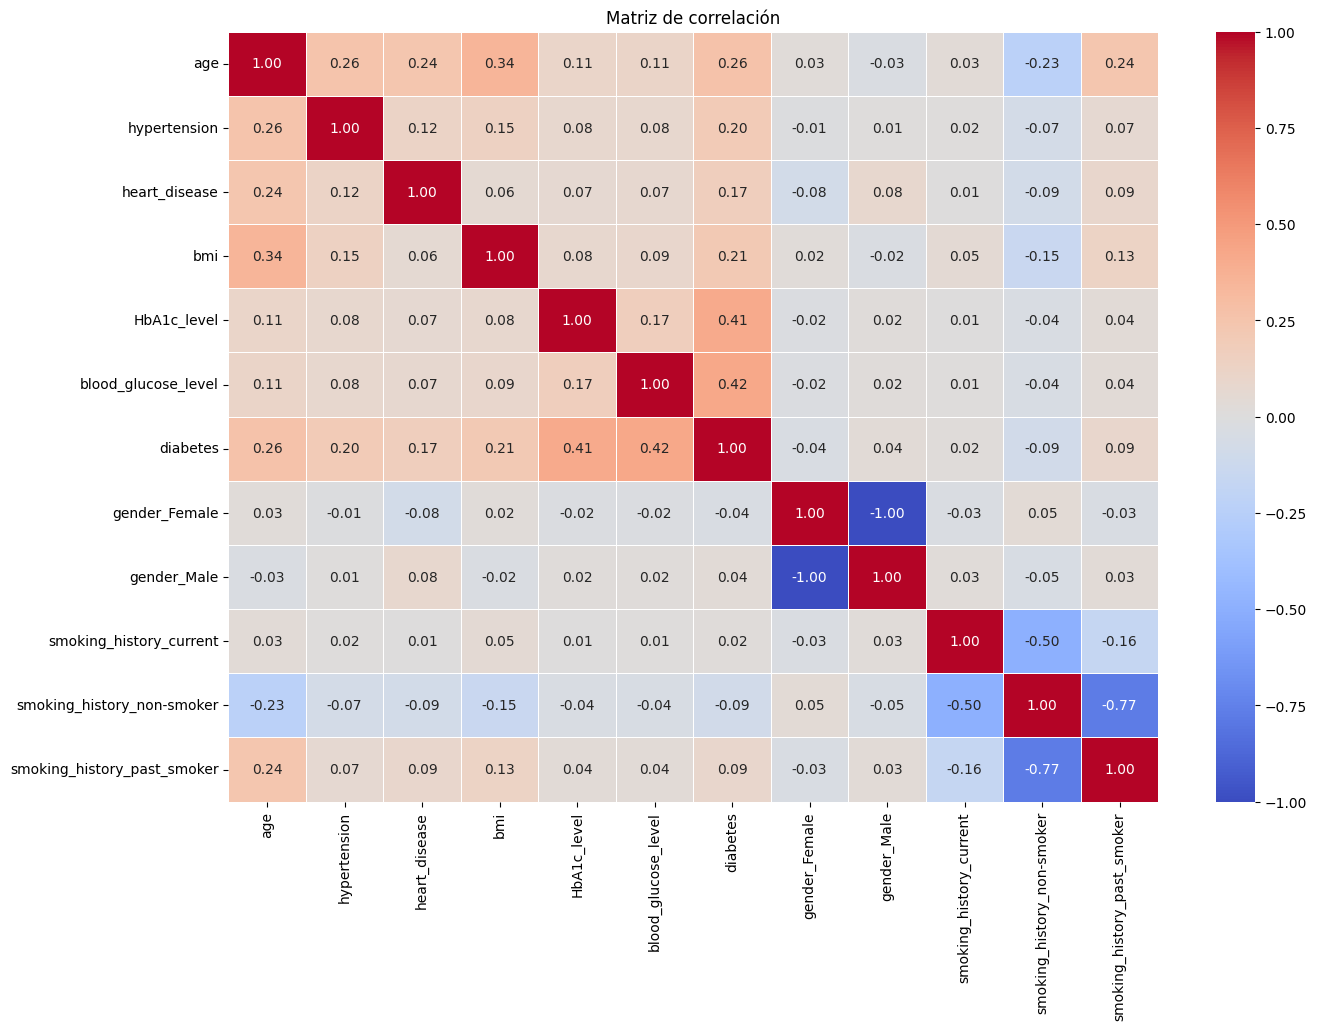

In [ ]:
# matrz de correlación
matriz_corr = datos.corr()
# gráfica 1:
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths = 0.5, fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

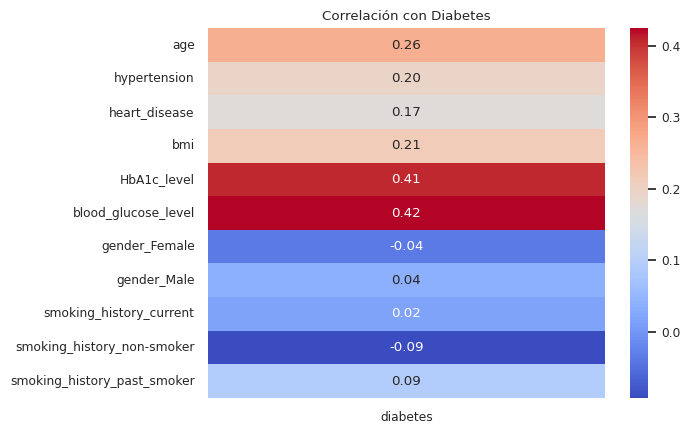

In [ ]:
# gráfico 2:
corr = datos.corr()
correlacion_diabetes = corr['diabetes'].drop('diabetes')
correlacion_diabetes.sort_values(ascending=False)
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(correlacion_diabetes.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlación con Diabetes')
plt.show()

## 3. Análisis predictivo:
Según el AED, el conjunto de datos está desequilibrado (con un 9% de casos positivos de diabetes y un 91% de casos negativos), por lo que es esencial equilibrar los datos para garantizar que el modelo no esté sesgado hacia la clase mayoritaria. Para ello, se utiliza la Técnica de Sobremuestreo Sintético de Minorías (SMOTE), que genera muestras sintéticas para la clase minoritaria.

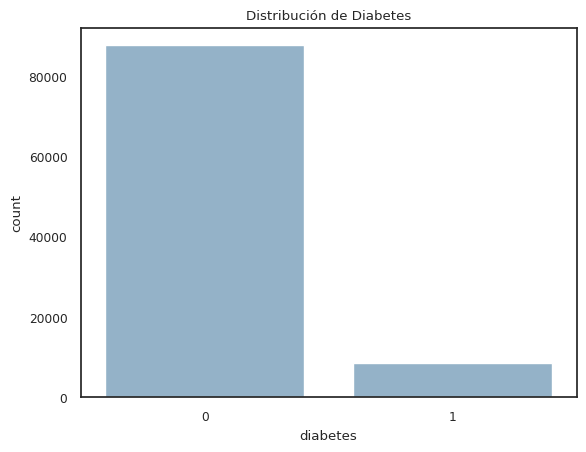

In [ ]:
# gráfico de frecuencia para la variable diabetes en el dataset:
sns.countplot(x='diabetes', data=datos)
plt.title('Distribución de Diabetes')
plt.show()

In [15]:
# Importemos librerias necesarias para esto:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Definir el preprocesamiento, remuestreo y clasificador
preprocessing = StandardScaler()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
classifier = RandomForestClassifier(random_state=42)

Comentarios:
* 'SMOTE' es una técnica de sobremuestreo que genera ejemplos sintéticos de la clase minoritaria para equilibrar las clases en el conjunto de datos.
* 'sampling_strategy=0.1' indica que la clase minoritaria será aumentada hasta que su tamaño sea el 10% del tamaño de la clase mayoritaria.

* 'RandomUnderSampler' es una técnica de submuestreo que reduce el tamaño de la clase mayoritaria seleccionando aleatoriamente ejemplos de la misma.
* 'sampling_strategy=0.5' indica que la clase mayoritaria será reducida hasta que su tamaño sea el 50% del tamaño de la clase minoritaria.

### 3.1 Estandarización de variables

El preprocesamiento es un paso crucial antes de entrenar el modelo. En este caso, las características numéricas se estandarizan (se elimina la media y se escala a la varianza unitaria) y las características categóricas se codifican en un solo paso. La estandarización no es necesaria para todos los modelos, pero suele ser una buena práctica.
One-hot encoding es necesaria para que el modelo de aprendizaje automático comprenda correctamente las variables categóricas.

In [16]:
# Define preprocessor
procesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = datos.drop('diabetes', axis=1)
y = datos['diabetes']

### clf = imbPipeline(steps=[('preprocessor', preprocessor),
#                      ('over', over),
#                      ('under', under),
#                      ('classifier', RandomForestClassifier())])

In [ ]:
# Crear un pipeline que preprocese los datos, remuestree los datos y luego entrene un clasificador.
pipeline = imbPipeline([
    ('preprocessing', preprocessing),
    ('over', over),
    ('under', under),
    ('classifier', RandomForestClassifier())
])

Un pipeline es una secuencia de pasos de procesamiento de datos que se ejecutan en orden secuencial, donde la salida de cada paso se convierte en la entrada del siguiente. En el contexto del machine learning y procesamiento de datos, un pipeline es una manera estructurada y reproducible de aplicar transformaciones y modelos a los datos. Los pipelines son especialmente útiles para automatizar flujos de trabajo, garantizar la consistencia y reducir el riesgo de errores.

### 3.2 Construcción de modelos y ajuste de hiperparámetros:

Utilizamos un RandomForestClassifier, que es un algoritmo popular y potente para tareas de clasificación. Los hiperparámetros del modelo se ajustan mediante GridSearchCV , que realiza una búsqueda exhaustiva de los valores de los parámetros especificados para el estimador. El modelo más eficaz se selecciona mediante validación cruzada.

In [17]:
# definimos los hiperparametros y lo valores que queremos testear:
parame_grid = {
    'classifier__n_estimators': [50, 100, 200], # número de arboles del RF
    'classifier__max_depth': [None, 10, 20], # profundidad máxima del árbol
    'classifier__min_samples_split': [2, 5, 10], # número mínimo de muestras requeridas para dividir un nodo
    'classifier__min_samples_leaf': [1, 2, 4] # número mínimo de muestras requeridas en cada hoja
}

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# asegurarnos que los datos no contienen datos nulos
print(datos.isnull().sum())

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
gender_Female                  0
gender_Male                    0
smoking_history_current        0
smoking_history_non-smoker     0
smoking_history_past_smoker    0
dtype: int64


In [21]:
# dándole una vista a los datos
datos.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_non-smoker,smoking_history_past_smoker
0,80.00,0,1,25.19,6.60,140,0,True,False,False,True,False
1,54.00,0,0,27.32,6.60,80,0,True,False,False,True,False
2,28.00,0,0,27.32,5.70,158,0,False,True,False,True,False
3,36.00,0,0,23.45,5.00,155,0,True,False,True,False,False
4,76.00,1,1,20.14,4.80,155,0,False,True,True,False,False


In [ ]:
# Definir los diferentes scorers
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
scorers = {
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'roc_auc': 'roc_auc',
}

# crear un buscador grid para los valores:
grid_search = GridSearchCV(pipeline, parame_grid, cv=3,n_jobs=-1, refit='roc_auc', error_score='raise')

# Ajustar el GridSearchCV dentro de un bloque try-except para capturar y analizar errores
try:
    grid_search.fit(X_train, y_train)
except Exception as e:
    print(f"Error durante el ajuste del modelo: {e}")

# Si no hay errores, evaluar el modelo
if hasattr(grid_search, 'best_params_'):
    print(f"Mejores hiperparámetros: {grid_search.best_params_}")
    print(f"Mejor puntuación de validación: {grid_search.best_score_}")

    # Evaluar el modelo en el conjunto de prueba
    test_score = grid_search.score(X_test, y_test)
    print(f"Puntuación en el conjunto de prueba: {test_score}") # ROC-AUC

Mejores hiperparámetros: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Mejor puntuación de validación: 0.953122155470599
Puntuación en el conjunto de prueba: 0.9493914490793717


In [19]:
# Importar las librarias necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Definir los mejores hiperparámetros
best_params = {
    'max_depth': 10,
    'min_samples_leaf': 4,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Crear el modelo Random Forest con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Entrenar el modelo con el conjunto de entrenamiento
best_rf_model.fit(X_train, y_train)

# Evaluar el modelo con el conjunto de prueba
y_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Puntuación en el conjunto de prueba:", test_accuracy)
print(classification_report(y_test, y_pred))

# Guardar el modelo entrenado para uso futuro
joblib.dump(best_rf_model, 'best_rf_model.joblib')


Puntuación en el conjunto de prueba: 0.9692603765733901
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       1.00      0.65      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



['best_rf_model.joblib']

**Mejores hiperparámetros: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Mejor puntuación de validación: 0.9753170802641415
Puntuación en el conjunto de prueba: 0.9724811032530164**

Conclusiones:
* 'classifier__max_depth' (profundidad máxima) = 10: indica que la profundidad máxima de los árboles del bosque es de 10 niveles. Limitar la profundidad del árbol ayuda a reducir el sobreajuste. De este resultado se desprende que un árbol de complejidad media es el más adecuado para nuestros datos. Demasiada complejidad (un árbol más profundo) puede capturar ruido, y demasiado poca (un árbol menos profundo) puede no capturar la estructura subyacente de los datos.

*  'classifier__min_samples_leaf' (muestras mínimas por hoja)= 4: Esto significa que cada hoja (el nodo final de un árbol de decisión, donde se hacen las predicciones) debe contener al menos dos muestras. Este parámetro, al igual que profundidad_máxima, es una forma de controlar el sobreajuste. Al requerir al menos dos muestras para realizar una predicción, el modelo evita el ajuste a valores atípicos o ruido en los datos de entrenamiento.

* 'classifier__min_samples_split' = 2: indica que un nodo debe contener al menos 10 muestras para ser dividido (para crear dos nodos hijos). Al igual que el parámetro min_samples_leaf, puede ayudar a controlar el sobreajuste.

* classifier__n_estimators' = 100: es el número de árboles de decisión del bosque. El algoritmo Random Forest funciona promediando las predicciones de muchos árboles de decisión para hacer una predicción final, lo que ayuda a reducir el sobreajuste y la varianza. En este caso, parece que tener 200 árboles en el bosque nos da el mejor rendimiento.

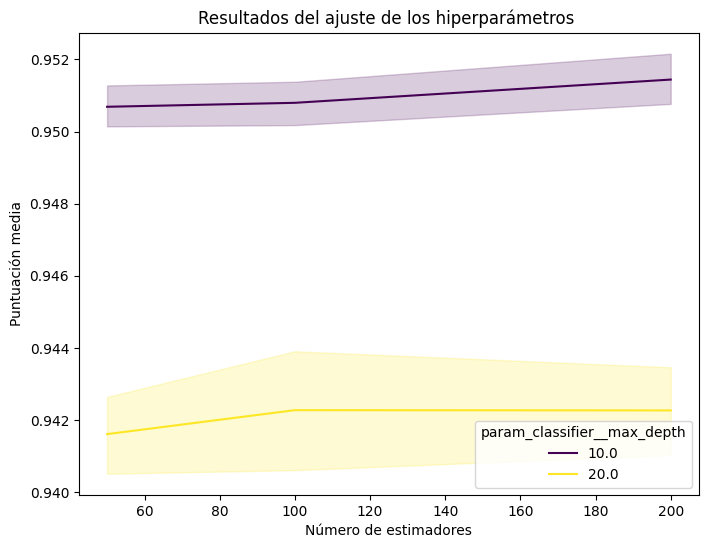

In [ ]:
results_df_fin = pd.DataFrame(grid_search.cv_results_)
# gráfico

plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df_fin, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Resultados del ajuste de los hiperparámetros ')
plt.xlabel('Número de estimadores')
plt.ylabel('Puntuación media')
plt.show()

### Matriz de confusión:
El modelo entrenado se evalúa en el conjunto de pruebas. La matriz de confusión se utiliza para visualizar el rendimiento del modelo. Muestra las predicciones positivas verdaderas, negativas verdaderas, falsas positivas y falsas negativas del modelo.

Model Accuracy:  0.9692603765733901
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       1.00      0.65      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



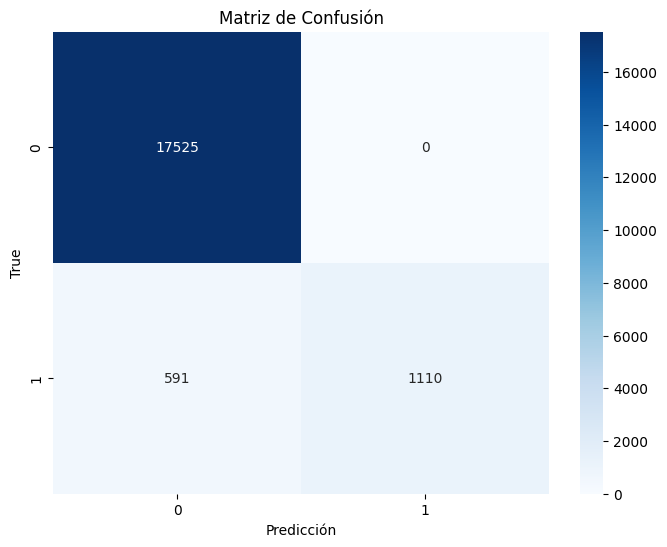

In [ ]:
# Predecir en el conjunto de prueba utilizando el mejor modelo
y_pred = best_rf_model.predict(X_test)

# Evaluar el modelo
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Gráfico de la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('True')
plt.show()

### 3.333333 Caracteristicas destacadas:
Por último, se calcula la importancia de cada característica. Se trata de la disminución total de la impureza del nodo (ponderada por la probabilidad de llegar a ese nodo, que se aproxima por la proporción de muestras que llegan a ese nodo) promediada en todos los árboles del conjunto. La importancia de las características permite saber qué características son más útiles para hacer predicciones. Las características se clasifican según su importancia y se visualizan mediante un diagrama de barras.

In [ ]:
y_prob = best_rf_model.predict_proba(X_test)
import numpy as np
from sklearn.metrics import roc_curve, auc

# Supongamos que estamos interesados en la clase 1
class_index = 1

# Obtén las probabilidades de la clase de interés
y_prob_class = y_prob[:, class_index]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test == class_index, y_prob_class)

# Calcula el AUC
roc_auc = auc(fpr, tpr)

# Encontrar el mejor punto de corte (usamos el punto más cercano a la esquina superior izquierda)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f'El punto de corte óptimo es {optimal_threshold:.2f} con un AUC de {roc_auc:.2f}')

El punto de corte óptimo es 0.08 con un AUC de 0.97


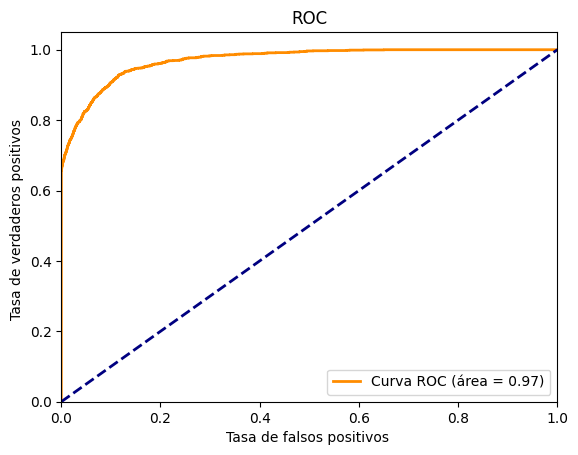

In [ ]:
# obteniendo la curva ROC (gráfica):
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Obtener las verdaderas etiquetas
y_true = y_test

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# gráfica de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos ')
plt.ylabel('Tasa de verdaderos positivos ')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()